In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
cali = fetch_california_housing()
df = pd.DataFrame(cali['data'], columns=cali['feature_names'])
df['target'] = cali['target']
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1]).round(4)
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,-1.2161,-0.2892,-0.1550,0.0774,-0.5126,-0.0491,1.8016,-0.7588,0.781
20636,-0.6916,-0.8454,0.2769,0.4624,-0.9444,0.0050,1.8063,-0.8187,0.771
20637,-1.1426,-0.9249,-0.0903,0.0494,-0.3695,-0.0717,1.7782,-0.8237,0.923
20638,-1.0546,-0.8454,-0.0402,0.1588,-0.6044,-0.0912,1.7782,-0.8736,0.847
20639,-0.7801,-1.0043,-0.0704,0.1384,-0.0340,-0.0437,1.7501,-0.8337,0.894


In [6]:
data = torch.from_numpy(df.values).float()
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

(torch.Size([20640, 8]), torch.Size([20640, 1]))

In [7]:
n_epochs = 30000
learning_rate = 1e-2
print_interval = 5000

In [8]:
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear1 = nn.Linear(input_dim, 5)
        self.linear2 = nn.Linear(5, 4)
        self.linear3 = nn.Linear(4, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.LeakyReLU()

    def forward(self, X):
        h = self.act(self.linear1(X))
        h = self.act(self.linear2(h))
        h = self.act(self.linear3(h))
        y = self.linear4(h)
        return y

In [9]:
model = MyModel(X.shape[-1], y.shape[-1])
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss:{loss:.6f}')

Epoch 5000: loss:0.375533
Epoch 10000: loss:0.352842
Epoch 15000: loss:0.341643
Epoch 20000: loss:0.333323
Epoch 25000: loss:0.331085
Epoch 30000: loss:0.329369


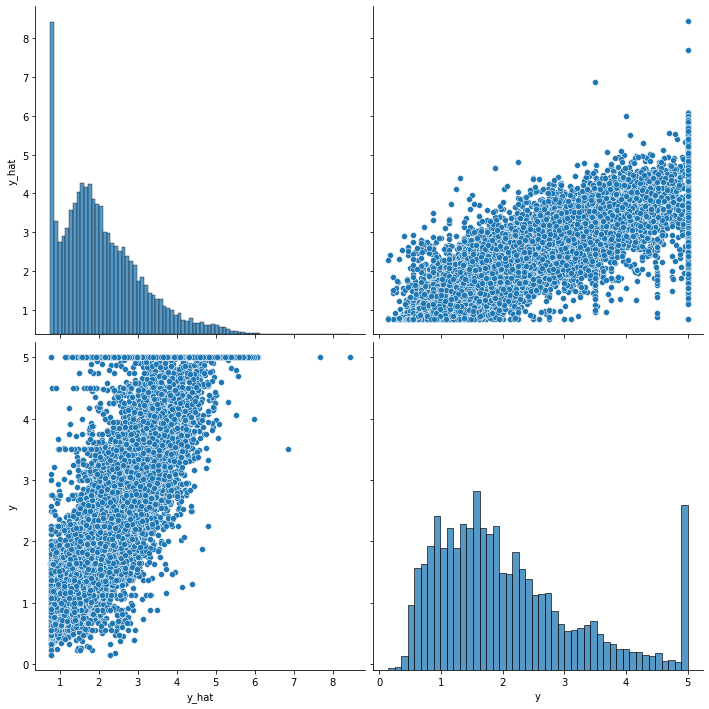

In [12]:
df = (pd.DataFrame(torch.concat([y_hat, y], dim=1).detach().numpy(), columns=['y_hat', 'y'])
)
sns.pairplot(df, height=5)
plt.show()